# 彩色图像密度分割算法

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [3]:
# 定义密度等级获得函数 
def get_color(v):
    t = 0
    if v == 0:
        t = 0
    elif v > 0 and v < 50:
        t = 1
    elif v >= 50 and v < 100:
        t = 2
    elif v >= 100 and v < 150:
        t = 3
    elif  v>= 150 and v < 200:
        t = 4
    else:
        t = 5
    return t

def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

def density_segment(src):
    rows,cols = src.shape[0],src.shape[1]
    gray = rgb2gray(src)
    
    dst = np.zeros_like(src)
    for i in range(rows):
        for j in range(cols):
            color = get_color(gray[i,j])
            if color == 1:
                dst[i,j] = [255,255,0]
            elif color == 2:
                dst[i,j] = [255,0,255]
            elif color == 3:
                dst[i,j] = [0,255,255]
            elif color == 4:
                dst[i,j] = [255,0,0]
            elif color == 5:
                dst[i,j] = [0,0,255]
            else:
                dst[i,j] = [0,0,0]
    return dst

In [4]:
dst = density_segment(src)

Text(0.5,1,'Color Density Segment')

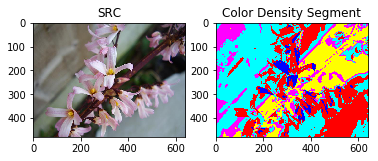

In [6]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Color Density Segment')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45040371